In [93]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [94]:
import tensorflow as tf

In [95]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        width_shift_range=0.3,
                                        height_shift_range=0.3)
x_train = train_datagen.flow_from_directory(
        'dataset/train',
        target_size = (64,64),
        # color_mode="grayscale",
        batch_size=4,
        class_mode='binary'
        )

Found 478 images belonging to 2 classes.


In [96]:
test_datagen = ImageDataGenerator(rescale=1./255)
x_test = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(64,64),
        batch_size=4,
        # color_mode="grayscale",
        class_mode='binary')

Found 148 images belonging to 2 classes.


In [97]:
vgg = tf.keras.applications.ResNet50(
    include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=(256,256,3),
    pooling=max
)

In [98]:
for layer in vgg.layers:
  layer.trainable = False

In [99]:
x = tf.keras.layers.Dropout(0.1)(vgg.output)
x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.1)(x)
prediction = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# # create a model object
model = tf.keras.models.Model(inputs=vgg.input, outputs=prediction)

# # view the structure of the model
model.summary()

# # tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [100]:
history = model.fit(
  x_train,
  validation_data=x_test,
  epochs=35,
)

Epoch 1/35
120/120 [==============================] - 18s 101ms/step - loss: 0.6906 - accuracy: 0.5251 - val_loss: 0.6907 - val_accuracy: 0.6216
Epoch 2/35
120/120 [==============================] - 10s 84ms/step - loss: 0.6868 - accuracy: 0.5565 - val_loss: 0.6562 - val_accuracy: 0.6824
Epoch 3/35
120/120 [==============================] - 10s 87ms/step - loss: 0.6603 - accuracy: 0.6025 - val_loss: 0.7096 - val_accuracy: 0.3446
Epoch 4/35
120/120 [==============================] - 11s 89ms/step - loss: 0.6624 - accuracy: 0.6234 - val_loss: 0.7046 - val_accuracy: 0.5405
Epoch 5/35
120/120 [==============================] - 10s 84ms/step - loss: 0.6746 - accuracy: 0.5711 - val_loss: 0.7719 - val_accuracy: 0.3514
Epoch 6/35
120/120 [==============================] - 10s 86ms/step - loss: 0.6870 - accuracy: 0.5502 - val_loss: 0.7431 - val_accuracy: 0.4662
Epoch 7/35
120/120 [==============================] - 10s 86ms/step - loss: 0.6661 - accuracy: 0.5962 - val_loss: 0.8995 - val_accuracy

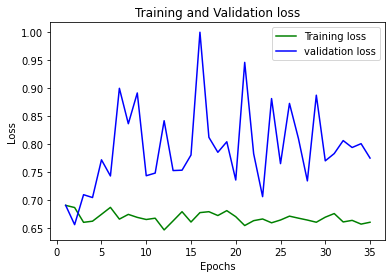

In [101]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,36)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

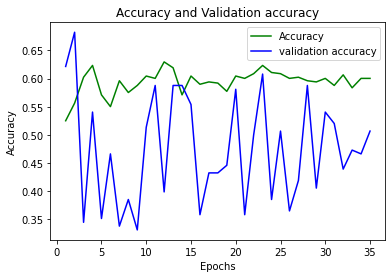

In [102]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,36)
plt.plot(epochs, loss_train, 'g', label='Accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Accuracy and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()